In [50]:
import numpy as np
random_state=0
rng = np.random.RandomState(random_state)
print(rng)
print(dir(rng))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'beta', 'binomial', 'bytes', 'chisquare', 'choice', 'dirichlet', 'exponential', 'f', 'gamma', 'geometric', 'get_state', 'gumbel', 'hypergeometric', 'laplace', 'logistic', 'lognormal', 'logseries', 'multinomial', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'pareto', 'permutation', 'poisson', 'poisson_lam_max', 'power', 'rand', 'randint', 'randn', 'random_integers', 'random_sample', 'rayleigh', 'seed', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'tomaxint', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf'

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from fig_code import visualize_tree, plot_tree_interactive

300 300


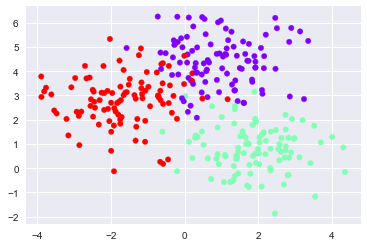

In [52]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow');
clf = DecisionTreeClassifier(max_depth=15)
i = np.arange(len(y))
rng.shuffle(i)
print (len(i), len(y) )   

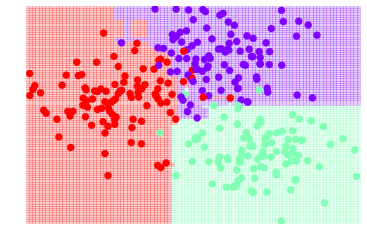

In [53]:
# Do random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False);

In [54]:
# Do regression
"""
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)
print(x, len(x))

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');
"""

"\nfrom sklearn.ensemble import RandomForestRegressor\n\nx = 10 * np.random.rand(100)\nprint(x, len(x))\n\ndef model(x, sigma=0.3):\n    fast_oscillation = np.sin(5 * x)\n    slow_oscillation = np.sin(0.5 * x)\n    noise = sigma * np.random.randn(len(x))\n\n    return slow_oscillation + fast_oscillation + noise\n\ny = model(x)\nplt.errorbar(x, y, 0.3, fmt='o');\n"

In [55]:
"""
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);
"""

"\nxfit = np.linspace(0, 10, 1000)\nyfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])\nytrue = model(xfit, 0)\n\nplt.errorbar(x, y, 0.3, fmt='o')\nplt.plot(xfit, yfit, '-r');\nplt.plot(xfit, ytrue, '-k', alpha=0.5);\n"

In [57]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.90666666666666662

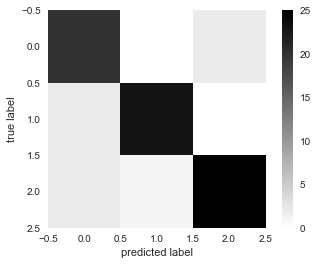

In [58]:
# Plot the confusion matrix
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");